# CNN

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import os
import cv2
import pandas as pd
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    for i in range(len(physical_devices)):
        tf.config.experimental.set_memory_growth(physical_devices[i], True)
print(len(physical_devices), 'devices detect')

4 devices detect


In [2]:
# import package
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

Digimon_path = "./dataset/train/Digimon/"
Pokemon_path = "./dataset/train/Pokemon/"
test_Digimon_path = "./dataset/test/Digimon/"
test_Pokemon_path = "./dataset/test/Pokemon/"

In [3]:
!find . -name ".DS_Store" -delete
import shutil
import os

nowpath = os.getcwd()
try:   
    shutil.rmtree(nowpath +'/dataset/train/Digimon/.ipynb_checkpoints')
except:
    pass
try:   
    shutil.rmtree(nowpath +'/dataset/train/Pokemon/.ipynb_checkpoints')
except:
    pass
try:   
    shutil.rmtree(nowpath +'/dataset/test/Digimon/.ipynb_checkpoints')
except:
    pass
try:   
    shutil.rmtree(nowpath +'/dataset/test/Pokemon/.ipynb_checkpoints')
except:
    pass

## Load data

In [4]:
from os import listdir
import cv2

img_data = []
labels = []

size = 200,200
def iter_images(images,directory,size,label):
     for i in range(len(images)):
            if "gif" in images[i]: 
                continue
            img = cv2.imread(directory + images[i])
            img = cv2.resize(img,size,PIL.Image.ANTIALIAS)
            img_data.append(img)
            labels.append(label)

iter_images(listdir(Digimon_path),Digimon_path,size,0)
iter_images(listdir(Pokemon_path),Pokemon_path,size,1)

In [5]:
len(img_data),len(labels)

(1842, 1842)

In [6]:
from os import listdir
import cv2



test_data = []
test_labels = []

size = 200,200
def iter_images(images,directory,size,label):
     for i in range(len(images)):
            if "gif" in images[i]: 
                continue
            img = cv2.imread(directory + images[i])
            img = cv2.resize(img,size,PIL.Image.ANTIALIAS)
            test_data.append(img)
            test_labels.append(label)

iter_images(listdir(test_Digimon_path),test_Digimon_path,size,0)
iter_images(listdir(test_Pokemon_path),test_Pokemon_path,size,1)

In [7]:
test_labels= np.array(test_labels,dtype=np.int32)
len(test_data),len(test_labels)

(21, 21)

## 2 ) Data preprocessing

In [8]:
train_X = np.asarray(img_data)
train_Y = np.asarray(labels)

idx = np.arange(train_X.shape[0])
np.random.shuffle(idx)

train_X = train_X[idx]
train_Y = train_Y[idx]

testData=np.asarray(test_data)

print(train_X.shape)
print(train_Y.shape)

(1842, 200, 200, 3)
(1842,)


In [9]:
import numpy as np
data = np.asarray(img_data)
testData=np.asarray(test_data, dtype=np.float64)

#div by 255
data = data / 255.0
testData=testData/255.0

labels = np.asarray(labels)
test_labels = np.asarray(test_labels)

0

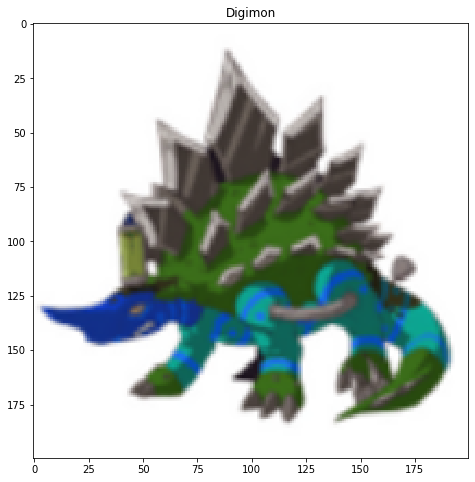

In [10]:
classes = {0:'Digimon', 1:'Pokemon'}
def plot_image(number):
    fig = plt.figure(figsize = (15,8))
    plt.imshow(data[number])
    plt.title(classes[labels[number]])
plot_image(0)
labels[0]

## 建立模型

In [86]:
# Convert class vectors to binary class matrices.
num_classes = 5
img_size = 200

In [74]:
learning_rate = 0.0001
batch_size = 32 
epochs = 2

optimizer = keras.optimizers.Adam(lr=learning_rate)

In [75]:
# inputs = Input(shape=(img_size, img_size, 3))

# x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
# x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)

# x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
# x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Dropout(0.25)(x)

# x = Flatten()(x)
# x = Dense(512, activation='relu')(x)
# x = Dropout(0.25)(x)
# outputs = Dense(num_classes, activation='softmax')(x)


# model = Model(inputs=inputs, outputs=outputs)

In [87]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(2))
model.add(Activation('softmax'))

In [88]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
activation_26 (Activation)   (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 198, 198, 32)      9248      
_________________________________________________________________
activation_27 (Activation)   (None, 198, 198, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 99, 99, 64)        18496     
_________________________________________________________________
activation_28 (Activation)   (None, 99, 99, 64)       

## 訓練模型

In [90]:
history = model.fit(data, labels, epochs=epochs,validation_data=(testData, test_labels))

Train on 1842 samples, validate on 21 samples
Epoch 1/2
1842/1842 [==============================] - 6s 3ms/sample - loss: 0.1121 - accuracy: 0.9663 - val_loss: 0.1904 - val_accuracy: 0.9524
Epoch 2/2
1842/1842 [==============================] - 5s 3ms/sample - loss: 0.0311 - accuracy: 0.9908 - val_loss: 0.1552 - val_accuracy: 0.9524


In [68]:
results = model.evaluate(x=testData, y=test_labels, verbose=0)
print("test loss, test acc:", results)

test loss, test acc: [0.20216383039951324, 0.95238096]


### Confusion Matrix
驗證集測試，查看混淆矩陣。混淆矩陣是機器學習中總結分類模型預測結果的情形分析表，以矩陣形式將數據集中的記錄按照真實的類別與分類模型預測的類別判斷兩個標准進行匯總。其中矩陣的行表示真實值，矩陣的列表示預測值。

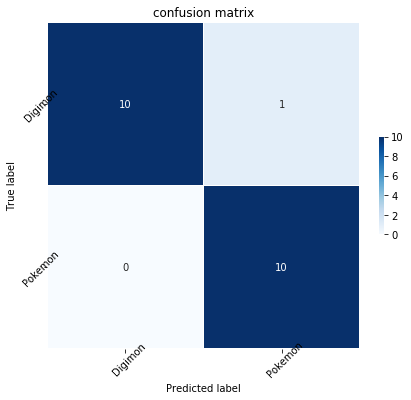

In [69]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

## plot confusion matrix
y_preds = model.predict(testData)
y_preds = np.argmax(y_preds, axis=1)
y_trues = test_labels
cm = confusion_matrix(y_trues, y_preds)

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)

ax.set(
    xticklabels=list(classes.values()),
    yticklabels=list(classes.values()),
    title='confusion matrix',
    ylabel='True label',
    xlabel='Predicted label'
)
params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
plt.show()

In [70]:
from sklearn.metrics import accuracy_score
y_preds = model.predict(testData)
y_preds = np.argmax(y_preds, axis=1)
y_trues = test_labels

accuracy_score(y_preds, y_trues)

0.9523809523809523

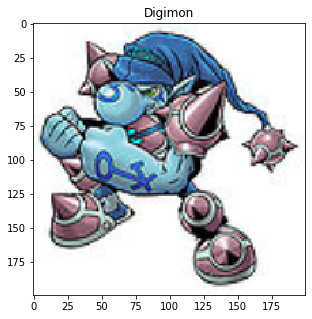

In [71]:
def plot_image(number):
    fig = plt.figure(figsize = (8,5))
    plt.imshow(data[number])
    plt.title(classes[labels[number]])
plot_image(10)

In [72]:
conv_outputs, predictions = grad_model(np.array([data[10]]))
predictions.shape

TensorShape([1, 6])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


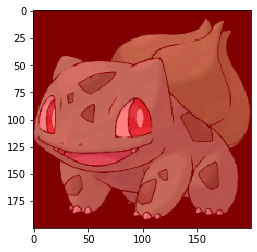

In [85]:
LAYER_NAME = model.layers[-6].name
CLASS_INDEX = 0

img=test_data[12]
img=img.astype('float32')

grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(LAYER_NAME).output, model.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img]))
    loss = predictions[:, CLASS_INDEX]

output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]

gate_f = tf.cast(output > 0, 'float32')
gate_r = tf.cast(grads > 0, 'float32')
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

weights = tf.reduce_mean(guided_grads, axis=(0, 1))

cam = np.ones(output.shape[0: 2], dtype = np.float32)

for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (200, 200))
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

output_image = cv2.addWeighted(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, cam, 1, 0)

# cv2.imwrite('cam.png', output_image)
plt.imshow(output_image)